In [1]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

In [4]:
df = pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\EDA2\\EDA2\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_total,working_hours_per_year,log_capital_gain
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1.0,0.0,2174,2080,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1.0,0.0,0,676,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1.0,0.0,0,2080,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1.0,0.0,0,2080,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0.0,0.0,0,2080,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30928,22,4,310152,15,10,4,11,1,4,0,0,40,39,1.0,0.0,0,2080,0.000000
30929,27,4,257302,7,12,2,13,5,4,0,0,38,39,0.0,0.0,0,1976,0.000000
30930,40,4,154374,11,9,2,7,0,4,0,0,40,39,1.0,1.0,0,2080,0.000000
30931,58,4,151910,11,9,6,1,4,4,0,0,40,39,0.0,0.0,0,2080,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30933 entries, 0 to 30932
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     30933 non-null  int64  
 1   workclass               30933 non-null  int64  
 2   fnlwgt                  30933 non-null  int64  
 3   education               30933 non-null  int64  
 4   education_num           30933 non-null  int64  
 5   marital_status          30933 non-null  int64  
 6   occupation              30933 non-null  int64  
 7   relationship            30933 non-null  int64  
 8   race                    30933 non-null  int64  
 9   capital_gain            30933 non-null  int64  
 10  capital_loss            30933 non-null  int64  
 11  hours_per_week          30933 non-null  int64  
 12  native_country          30933 non-null  int64  
 13  sex_ Male               30933 non-null  float64
 14  income_ >50K            30933 non-null

In [6]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_total,working_hours_per_year,log_capital_gain
count,30933.000000,30933.000000,3.093300e+04,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000,30933.000000
mean,38.121003,3.882359,1.895186e+05,10.334335,10.047069,2.607604,6.581192,1.424175,3.684673,336.909967,72.967963,40.475706,36.996250,0.675331,0.222093,263.942004,2104.736689,0.485613
std,13.325987,1.412188,1.041237e+05,3.836932,2.497519,1.495187,4.207525,1.585482,0.820584,1625.979553,364.271794,11.682576,7.256455,0.468259,0.415660,1680.973618,607.493935,1.976380
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3900.000000,52.000000,0.000000
25%,27.000000,4.000000,1.183370e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,0.000000,0.000000,2080.000000,0.000000
50%,37.000000,4.000000,1.787780e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,40.000000,39.000000,1.000000,0.000000,0.000000,2080.000000,0.000000
75%,47.000000,4.000000,2.366840e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,45.000000,39.000000,1.000000,0.000000,0.000000,2340.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,15024.000000,3900.000000,99.000000,41.000000,1.000000,1.000000,15024.000000,5148.000000,9.617471


In [7]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_num             0
marital_status            0
occupation                0
relationship              0
race                      0
capital_gain              0
capital_loss              0
hours_per_week            0
native_country            0
sex_ Male                 0
income_ >50K              0
capital_total             0
working_hours_per_year    0
log_capital_gain          0
dtype: int64

In [8]:
# Handling Missing Values
df.dropna(inplace=True)  # Removing missing values

In [9]:
# Scaling Numerical Features
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler_standard.fit_transform(
    df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])
df_standard_scaled[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]

,age,education_num,capital_gain,capital_loss,hours_per_week
0,0.065962,1.182365,1.129854,-0.200315,-0.040720
1,0.891430,1.182365,-0.207208,-0.200315,-2.351891
2,-0.009080,-0.419251,-0.207208,-0.200315,-0.040720
3,1.116558,-1.220058,-0.207208,-0.200315,-0.040720
4,-0.759506,1.182365,-0.207208,-0.200315,-0.040720
...,...,...,...,...,...
30928,-1.209761,-0.018847,-0.207208,-0.200315,-0.040720
30929,-0.834549,0.781961,-0.207208,-0.200315,-0.211918
30930,0.141005,-0.419251,-0.207208,-0.200315,-0.040720
30931,1.491771,-0.419251,-0.207208,-0.200315,-0.040720


In [10]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] = scaler_minmax.fit_transform(
    df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])
df_minmax_scaled[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] 

,age,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.800000,0.144702,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...
30928,0.068493,0.600000,0.000000,0.0,0.397959
30929,0.136986,0.733333,0.000000,0.0,0.377551
30930,0.315068,0.533333,0.000000,0.0,0.397959
30931,0.561644,0.533333,0.000000,0.0,0.397959


In [11]:
# Encoding Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns

ohe = OneHotEncoder(sparse_output=False, drop='first')
label_enc = LabelEncoder()

for col in categorical_features:
    if df[col].nunique() < 5:
        encoded_cols = pd.DataFrame(ohe.fit_transform(df[[col]]))
        encoded_cols.columns = ohe.get_feature_names_out([col])
        df = df.join(encoded_cols).drop(columns=[col])
    else:
        df[col] = label_enc.fit_transform(df[col])

In [12]:
# Feature Engineering
df['capital_total'] = df['capital_gain'] - df['capital_loss']  # Creating a meaningful feature
df['working_hours_per_year'] = df['hours_per_week'] * 52  # Another new feature
df['working_hours_per_year'] 

0        2080
1         676
2        2080
3        2080
4        2080
         ... 
30928    2080
30929    1976
30930    2080
30931    2080
30932    1040
Name: working_hours_per_year, Length: 30933, dtype: int64

In [13]:
# Log transformation on skewed numerical features
df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
30928    0.000000
30929    0.000000
30930    0.000000
30931    0.000000
30932    0.000000
Name: log_capital_gain, Length: 30933, dtype: float64

In [14]:
# Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df.select_dtypes(include=['number']))
df = df[outliers == 1]
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_total,working_hours_per_year,log_capital_gain
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1.0,0.0,2174,2080,7.684784
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1.0,0.0,0,676,0.000000
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1.0,0.0,0,2080,0.000000
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1.0,0.0,0,2080,0.000000
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0.0,0.0,0,2080,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30928,22,4,310152,15,10,4,11,1,4,0,0,40,39,1.0,0.0,0,2080,0.000000
30929,27,4,257302,7,12,2,13,5,4,0,0,38,39,0.0,0.0,0,1976,0.000000
30930,40,4,154374,11,9,2,7,0,4,0,0,40,39,1.0,1.0,0,2080,0.000000
30931,58,4,151910,11,9,6,1,4,4,0,0,40,39,0.0,0.0,0,2080,0.000000


In [15]:
# Feature Selection using PPS Score
pps_matrix = pps.matrix(df)
print(pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False))

                 x                       y  ppscore
0              age                     age      1.0
152           race                    race      1.0
57       education               education      1.0
58       education           education_num      1.0
75   education_num               education      1.0
..             ...                     ...      ...
127   relationship               workclass      0.0
125     occupation        log_capital_gain      0.0
124     occupation  working_hours_per_year      0.0
123     occupation           capital_total      0.0
162   capital_gain                     age      0.0

[324 rows x 3 columns]


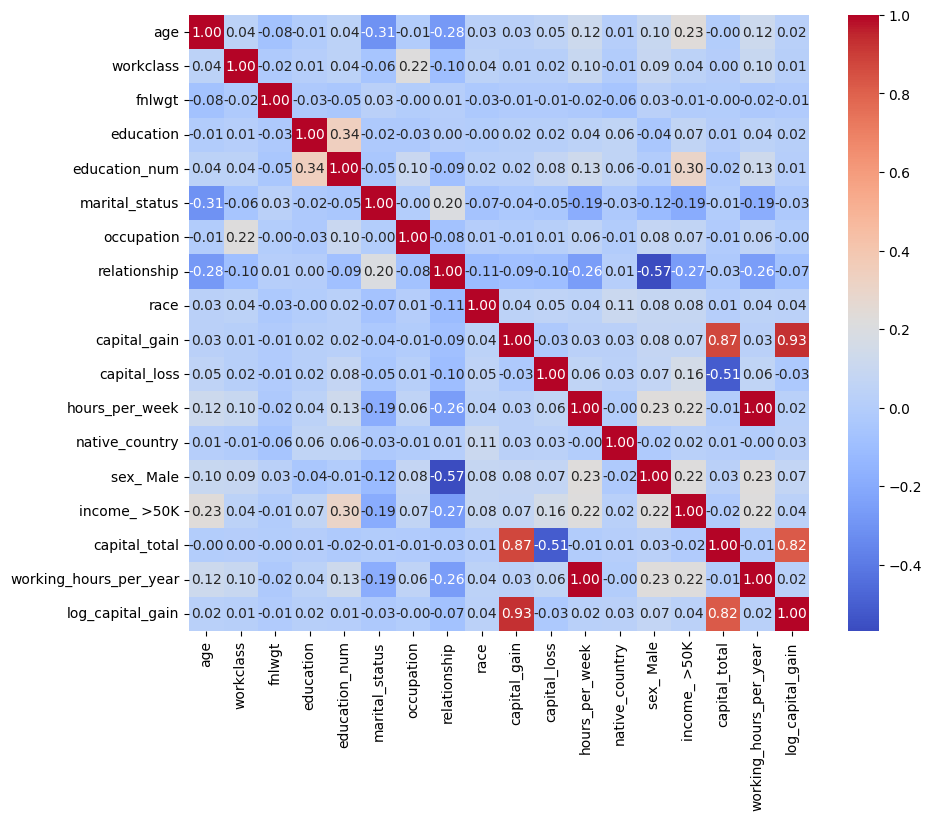

In [16]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [17]:
# Feature Engineering: Scaling Numerical Features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('income_ >50K')
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [19]:
# Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
X = df_scaled
y = df['income_ >50K']
selector = SelectKBest(score_func=f_classif, k=5)  # Selecting top 5 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['age', 'education_num', 'relationship', 'hours_per_week', 'working_hours_per_year']
